## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the data

data = pd.read_csv("insurance.csv")

In [3]:
# calling the dataframe to do all the basic checks

data.head(8) #data.head(8) calls first 8 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [4]:
data.describe()  #The describe() method returns description of the data in the DataFrame.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.info() #data.info() method pulls the basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

<AxesSubplot:xlabel='sex', ylabel='Count'>

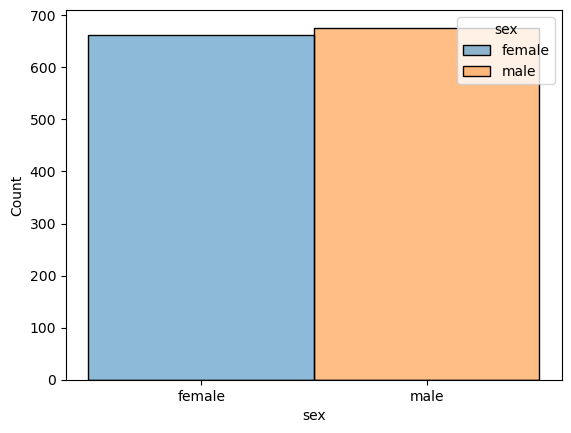

In [6]:
# Univariate Analysis
sns.histplot(x=data.sex,hue=data.sex)

In the above data the column named sex is balanced as female and males are approximately in equal numbers

<AxesSubplot:xlabel='region', ylabel='Count'>

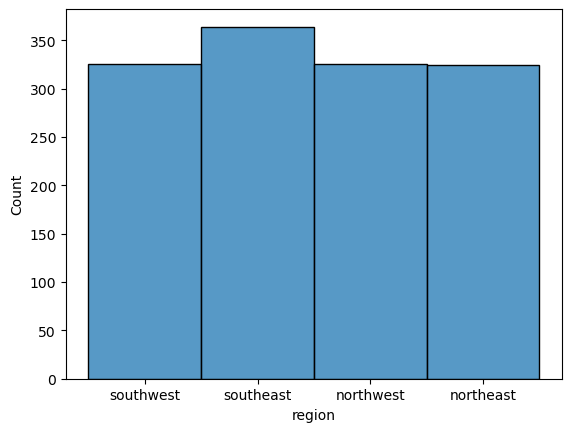

In [7]:
sns.histplot(x=data.region)

In the above data the column named region is also balanced as all the unique values are approximately in equal numbers

<AxesSubplot:xlabel='age', ylabel='Count'>

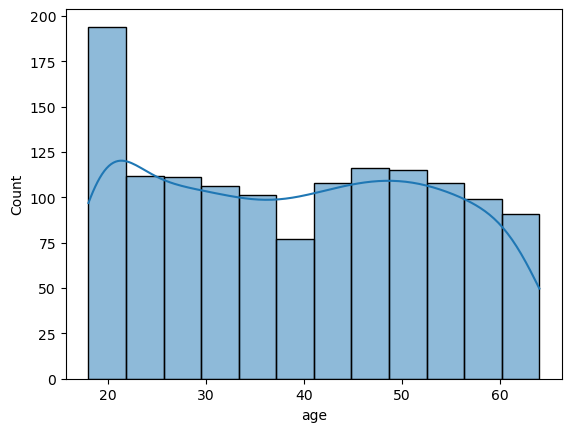

In [8]:
sns.histplot(x=data.age,kde=True)

<AxesSubplot:xlabel='age', ylabel='charges'>

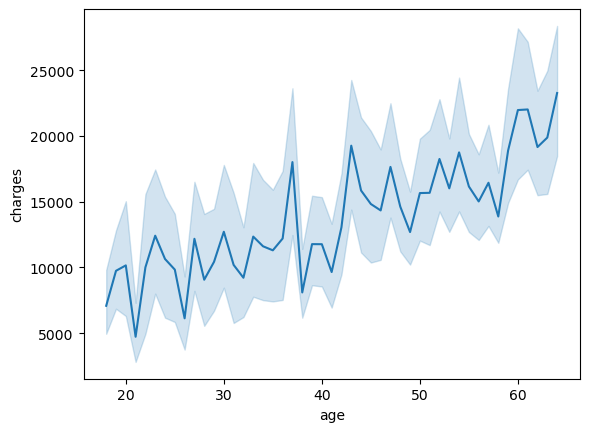

In [17]:
# Bivariate analysis
sns.lineplot(x=data.age,y=data.charges)

The above graph shows with increasing age the insurance charges increases

<AxesSubplot:xlabel='sex', ylabel='charges'>

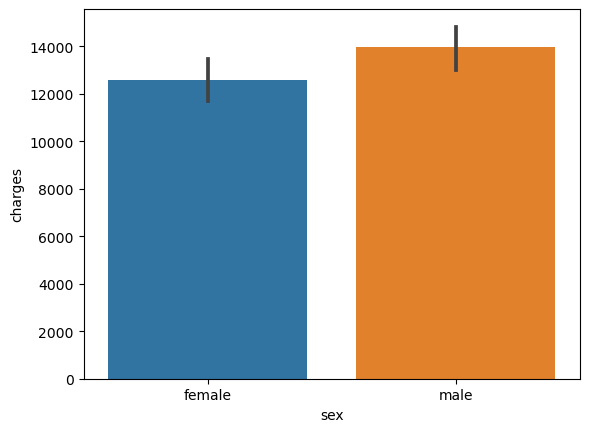

In [19]:
sns.barplot(x=data.sex,y=data.charges)

the above graph shows the charges for males are slightly higher as compared to females

<AxesSubplot:xlabel='children', ylabel='charges'>

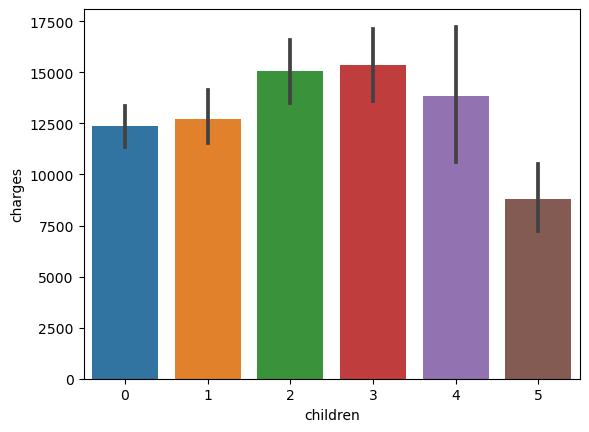

In [23]:
sns.barplot(x=data.children,y=data.charges)

## Data preprocessing and Feature Engineering

In [24]:
# finding missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Changing categorical values to numerical
data['sex'].replace(['male','female'],[1,0],inplace = True)

In [27]:
data['smoker'].replace(["yes","no"],[1,0],inplace = True)

In [28]:
print(data.region.value_counts().to_string())

southeast    364
southwest    325
northwest    325
northeast    324


In [29]:
# As in the region column there are only 4 unique values we will change the categorical data to numerical by labelling them
data['region'].replace(['southeast','southwest','northwest','northeast'],[1,2,3,4],inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [24]:
# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# data[['Age','Gender','Edulevel','Yoe']]=scale.fit_transform(data[['Age','Gender','Edulevel','Yoe']])

In [25]:
data.head()

,Age,Gender,Edulevel,Yoe,Salary
0,32.0,1,1,5.0,90000.0
1,28.0,0,2,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,1,7.0,60000.0
4,52.0,1,2,20.0,200000.0


## Model Creation

In [26]:
# Independent and dependent variable creation
X=data[['Age','Gender','Edulevel','Yoe']] ## X variable contains all inputs
y=data.Salary ## y is output

In [27]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [28]:
# Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [29]:
y_train

182    145000.0
54      50000.0
216     95000.0
291    180000.0
105    220000.0
         ...   
337     90000.0
367    150000.0
106     50000.0
228    120000.0
202    130000.0
Name: Salary, Length: 298, dtype: float64

In [30]:
# Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [31]:
y_test #Actual values

224     40000.0
192     45000.0
226    160000.0
284    100000.0
112    130000.0
         ...   
215    100000.0
98      90000.0
27      40000.0
19     180000.0
240    160000.0
Name: Salary, Length: 75, dtype: float64

In [32]:
y_predict # Values predicted by model

array([ 47098.0539397 ,  47795.06748479, 172633.30584438,  86620.05562488,
       158389.83839277, 171971.68254017,  90637.8355039 ,  44474.30115085,
        79345.83502242,  50418.82027364, 121854.69391861,  42149.06724405,
        59385.58684832,  67022.91187293,  80640.14626121, 120859.16149147,
       129790.53782527, 186947.55377775,  47098.0539397 ,  81969.58781127,
        49256.20332024,  62407.83430021, 173635.29314276,  98609.06965144,
       156392.31866725,  47098.0539397 ,  96248.44550376, 160679.6820587 ,
        49786.39226867,  68352.353423  ,  42149.06724405, 147425.55209258,
       186285.93047354, 183925.30632586, 150746.31842651, 152046.82460694,
        67022.91187293, 148392.14915008, 182929.51396912,  70677.5873298 ,
        78648.82147734, 192593.55401849,  48623.77531526,  76025.06868848,
       154401.25381298,  50120.30139159, 146430.01966544,  52744.05418044,
        81969.58781127, 172633.30584438,  87615.58805201,  61710.82075512,
        68352.353423  , 1

In [33]:
#Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
r2score=r2_score(y_test,y_predict)
r2score

0.9039262141270619

In [34]:
mr=mean_absolute_error(y_test,y_predict)
mr

11122.596489845855

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
tr_test=[[29,3,1,5]]
tr_predict=LR.predict(tr_test)
tr_predict

array([73934.02805323])

In [39]:
tr_test=[[22,1,1,0]]
tr_predict=LR.predict(tr_test)
tr_predict

array([22522.98812248])